# `ibip`
Image based invasion percolation algorithm to simulate volume controlled injection of non-wetting fluid into an image

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps

The arguments and their defaults are:

In [2]:
import inspect
inspect.signature(ps.filters.ibip)

<Signature (im, inlets=None, dt=None, maxiter=10000)>

## `im`
Can be a 2D or 3D image:

  0%|          | 0/9999 [00:00<?, ?it/s]

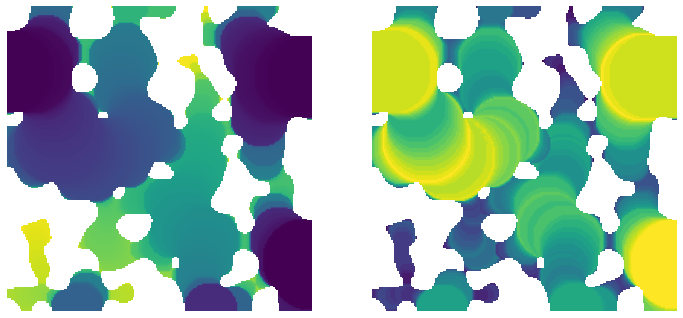

In [3]:
im = ps.generators.blobs(shape=[200, 200], porosity=0.7, blobiness=0.75)
ip = ps.filters.ibip(im=im)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(ip.inv_sequence/im, origin='lower')
ax[0].axis(False)
ax[1].imshow(ip.inv_sizes/im, origin='lower')
ax[1].axis(False);

The function results a ``Results`` object with an image containing the invasion sequence of each voxel (left) and the invasion size of each voxel (right).  These can be used to generate a capillary pressure curve.

## `inlets`
By default invasion begins from all sides, but the ``inlets`` can be specified.

  0%|          | 0/9999 [00:00<?, ?it/s]

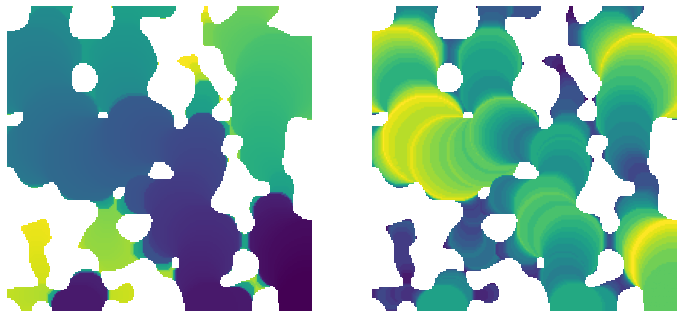

In [4]:
inlets = np.zeros_like(im)
inlets[0, ...] = True
ip = ps.filters.ibip(im=im, inlets=inlets)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(ip.inv_sequence/im, origin='lower')
ax[0].axis(False)
ax[1].imshow(ip.inv_sizes/im, origin='lower')
ax[1].axis(False);

## `maxiter`
The maximum number of iterations to run before stopping, mostly to prevent the algorithm from stalling (or appearing to stall) on huge images.

  0%|          | 0/499 [00:00<?, ?it/s]

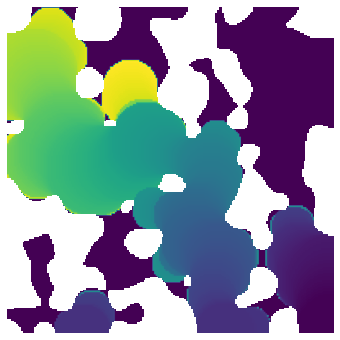

In [5]:
ip = ps.filters.ibip(im=im, inlets=inlets, maxiter=500)

fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(ip.inv_sequence/im, origin='lower')
ax.axis(False);